# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года. В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».



# Датафрейм имеет следующую структуру:
    
Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы долларов)

EU_sales — продажи в Европе (миллионы долларов)

JP_sales — продажи в Японии (миллионы долларов)

Other_sales — продажи в других странах (миллионы долларов)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


# План работы над проектом:
    
Просмотреть таблицу и выявить аномалии и пропущенные значения.

Провести предобработку таблицы: замена столбцов, заполнение пропусков, удаление дубликатов и т.д.
    
Провести анализ по данным и подготовить актуальные данные.

Составить портреты пользователей для купных регионов продаж.

Выполнить проверку гипотез.

Оформить проект и сделать выводы по каждому шагу.

# Шаг 1. Изучение и подготовка данных

Подготовьте данные

Замените названия столбцов (приведите к нижнему регистру);

Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;

Обработайте пропуски при необходимости:

Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;

Опишите причины, которые могли привести к пропускам;

Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;

Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Подключение всех модулей для работы

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from scipy import stats as st

Подключение и чтение файла с данными

In [49]:
games = pd.read_csv('/datasets/games.csv')

In [50]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [51]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [52]:
games.describe() 

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Вывод: 

-увидел много пропусков; 

-Year_of_Release имеет формат float, а должен быть int;
       
-User_Score имеет тип object, а должен быть float

Проверим кол-во пропусков

In [53]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

вывод: 
Пропусков много и они могли возникнуть по многим причинам:

-техническая ошибка;

-игра не популярна и ее никто не оценивал

Заменим пропущенные значения на пустые строки в стобцах Name и Genre:

In [54]:
games.columns = games.columns.str.lower() #переименуем столбцы

In [55]:
#замена пропущенных значений на пустые строки

games.fillna(
    {"name" : " ", 
     "genre" : " "}
    , inplace=True
)

TBD - аббревиатура от английского To Be Determined (будет определено) или To Be Decided (будет решено)
Скорее всего либо не было оценок, либо их было очень мало для формирования рейтинга

Заменим значение "tbd" - "to be determined" на NaN

In [56]:
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'].unique()
#games['user_score'] = games['user_score'].astype('float')

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [57]:
games['critic_score'].unique() #critic_score содержит в себе целые числа

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Приведем годы и оценки критиков в целочисленный тип:

In [58]:
games['year_of_release'] = games['year_of_release'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')


Оценки пользователей приведем к типу float:

In [59]:
games['user_score'] = games['user_score'].astype('float64')


Создадим отдельный столбец с суммой продаж по всем регионам 'total_sales'

In [60]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

Заменим пропущенные значения на "undefiend":

In [61]:
games["rating"] = games['rating'].fillna("undefined")

In [62]:
games.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,undefined,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,undefined,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,<NA>,NaN,undefined,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,<NA>,NaN,undefined,28.31


Удаление дупликатов

In [63]:
games.drop_duplicates()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       7590 non-null   float64
 10  rating           16715 non-null  object 
 11  total_sales      16715 non-null  float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 1.6+ MB


Поиск дупликатов по названию игры,платформе и году.

In [64]:
part_games = games.loc[:, 'name':'year_of_release']
part_games.drop_duplicates()
part_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             16715 non-null  object
 1   platform         16715 non-null  object
 2   year_of_release  16446 non-null  Int64 
dtypes: Int64(1), object(2)
memory usage: 408.2+ KB


Вывод: 

-проведены первичная обработка и анализ данных;
    
-пропусков много и они могли возникнуть по причинам технической ошибки или в силу того,что игра не популярна
 и ее никто не оценивал;

-заменил пропущенные значения на пустые строки в стобцах Name и Genre;
        
-привел годы и оценки критиков в целочисленный тип; 

-привел оценки пользователей к типу float;

-заменил в "rating" пропущенные значения на "undefiend";

-добавил отдельный столбец с суммой продаж по всем регионам 'total_sales'

# Шаг 2. Исследовательский анализ данных


Необходимо провести исследование и ответить на следующие вопросы:

Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
Не учитывайте в работе данные за предыдущие годы.

Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.

Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

Соотнесите выводы с продажами игр на других платформах.

Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

# Сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [65]:
def create_any_bar(groupby_column, func, y='name'):
    plt.style.use('seaborn-pastel')
    df_to_plot = games.groupby(groupby_column)[y]
    if func == 'count':
        df_to_plot_calculated = df_to_plot.count()
        figsize = (15,5)
        plot = df_to_plot_calculated.plot(kind='bar', y=y, figsize=figsize, ec='black')
    elif func == 'sum':
        df_to_plot_calculated = df_to_plot.sum().sort_values()
        figsize = (15,10)
        plot = df_to_plot_calculated.plot(kind='bar', y=y, figsize=figsize, ec='black')

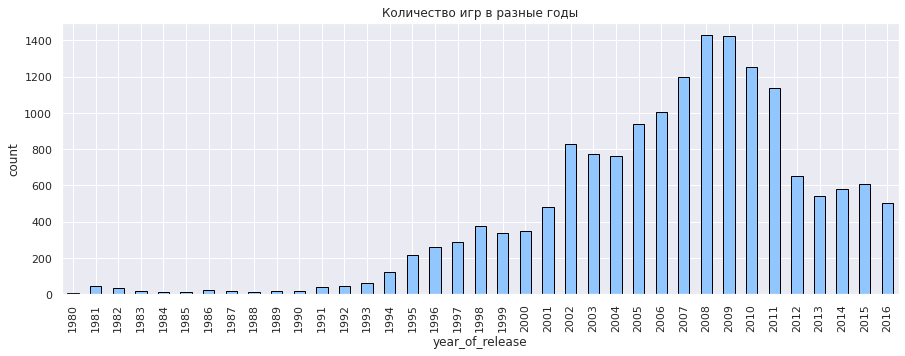

In [66]:
create_any_bar('year_of_release', 'count')
plt.title('Количество игр в разные годы')
plt.xlabel('year_of_release')
plt.ylabel('count')
plt.show()

Вывод: судя по гистограмме, до 1993-1994гг выпускалось мало игр, это может быть связано с тем, что мало у кого в то время были компьютеры, и техника тех лет не позволяла создавать большое количество игр.
В 2002 году наблюдаем уже скачок по количеству игр ,а пик приходится на 2008-2009 года. Затем начался спад, возможно, он связан с развитием мобильных телефонов,это привело к спаду интереса к играм и их покупке, и соответственно их производству.

# Сколько игр выпускалось на каждую платформу за весь анализируемый период

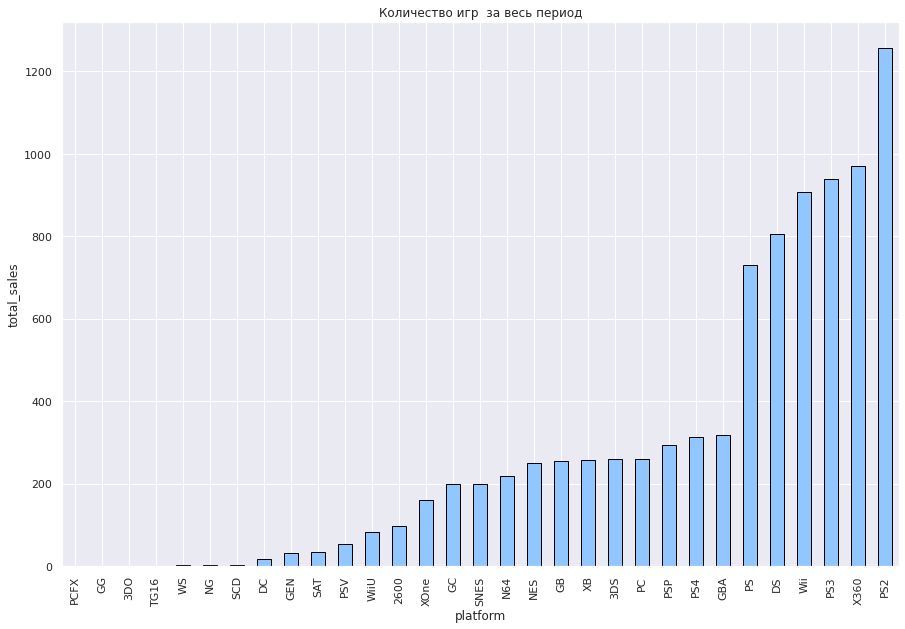

In [67]:
create_any_bar('platform', 'sum', 'total_sales')
plt.title('Количество игр  за весь период')
plt.xlabel('platform')
plt.ylabel('total_sales')
plt.show()

Вывод: явным лидером является платформа PS2. Далее идут Xbox360, PS3 и Wii.

In [68]:
!pip install plotly
from plotly.offline import init_notebook_mode, iplot
import plotly
import plotly.graph_objs as go

Рост рынка игр начался с 1994 года,поэтому расматривать данные будем с 1994г

In [69]:
df_1994 = games[games['year_of_release']>=1994]

# Как менялись продажи по платформам? Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Ответим на вопрос: за какой характерный срок появляются новые и исчезают старые платформы?


In [70]:
platforms_leaders = df_1994.groupby('platform')['total_sales'].sum().sort_values()[-5:].index.tolist() #топ5 платформ

data = []

for platform in platforms_leaders:
    data.append(
        go.Bar(x=df_1994[df_1994.platform==platform].groupby("year_of_release")['total_sales'].sum().index,
               y=df_1994[df_1994.platform==platform].groupby("year_of_release")['total_sales'].sum(),
               name=platform)
    )
layout = {'title': 'Продажи игр по годам'}
    
fig = go.Figure(data=data, layout=layout)
fig.show()

Вывод: судя по гистограмме,наблюдаю спад продаж практически всех платформ к 2013-2014году.
В среднем консоль живет 9-10 лет,видимо, это связано с техническим прогрессом.

PS2 с 2000 по 2010 ( 10 лет)

DS с 2004 по 2013 (9 лет)


X360 с 2006 по 2015 (9 лет)

Wii 2006 - 2015 (9 лет)

PS3 2006 - 2016 (10 лет)

Многие платформы повявились в 2006г.(Wii, PS3, X360),но к 2013 году наблюдаем их активный спад, и видим рост актуальных в нынешнее время платформ, их в дальнейшем мы и будем разбирать. Таким образом  актульные данные начинаются с 2013г.

In [71]:
games= games[games['year_of_release']>=2013]

# Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.

In [72]:
data = []

for platform in games['platform'].unique():
    data.append(
        go.Scatter(x=games[games.platform==platform].groupby("year_of_release")['total_sales'].sum().index,
               y=games[games.platform==platform].groupby("year_of_release")['total_sales'].sum(),
               name=platform)
    )
layout = {'title': 'Продажи игр по годам'}
    
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link = False)

Вывод: на конец 2016г. лидируют по продажам следующие платформы:

PS4;

Xone;

3DS.

Также на графике вижу общий спад продаж

Построем график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.

In [73]:
data = []

for platform in games['platform'].unique():
    data.append(
        go.Box(y=games[games.platform==platform]['total_sales'], 
               name=platform )
    )
    
layout = {'title': 'Продажи игр по платформам'}
fig = go.Figure(data=data, layout=layout)

fig.update_layout(yaxis=dict(range=[0,1])) #  масштаб по оси y 

iplot(fig, show_link = False)

# Выделим топ6 платформ с которыми будем дальше работать

In [74]:
games_top_6_platforms = games[games['platform'].isin(['PS4','XOne','PC','WiiU','3DS', 'PSV'])]
games_top_6_platforms = games_top_6_platforms[games_top_6_platforms['total_sales']<1.4]

In [75]:
games_top_6_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,279.0,0.176237,0.234220,0.01,0.03,0.08,0.220,1.38
PC,186.0,0.178978,0.249262,0.01,0.03,0.07,0.220,1.36
PS4,326.0,0.258558,0.298397,0.01,0.05,0.12,0.360,1.32
PSV,357.0,0.086919,0.117891,0.01,0.02,0.04,0.110,0.80
WiiU,105.0,0.302952,0.324040,0.01,0.05,0.18,0.460,1.30
XOne,215.0,0.315907,0.364930,0.01,0.05,0.16,0.455,1.39


строим график «ящик с усами» по глобальным продажам игр в разбивке по актуальным платформам(топ6)

In [76]:
data = []

for platform in games_top_6_platforms['platform'].unique():
    data.append(
        go.Box(y=games_top_6_platforms[games_top_6_platforms.platform==platform]['total_sales'], 
               name=platform )
    )
    
layout = {'title': 'Продажа игр по платформам'}
fig = go.Figure(data=data, layout=layout)

fig.update_layout(yaxis=dict(range=[0,1])) #  масштаб по оси y

iplot(fig, show_link = False)

Вывод: 

Наибольшие медианные продажи у платформы WiiU, далее у XOne и PS4;

Положение XOne и PS4 можно объяснить тем, что данные приставки позднее остальных вышли на рынки;

Почти у всех платформ есть много выбросов,наверное это игры, которые многим нравились; 

Компьютерные игры (PC) стоят дешевле консольных и приставки  более приспособлены для игр.

# Как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.


В качестве платформы выбираю PS4

Диаграмма рассеяния для платформы PS4


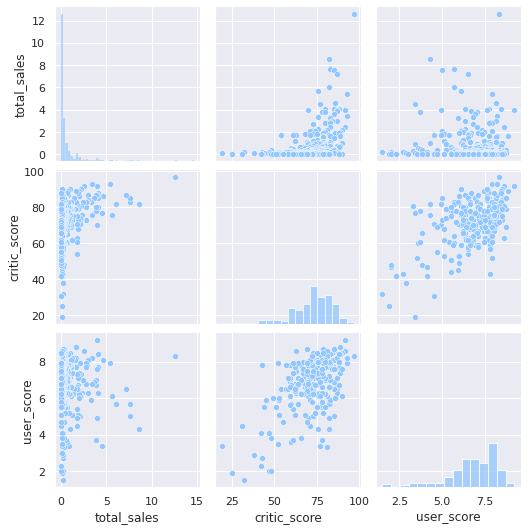

In [77]:
print("Диаграмма рассеяния для платформы PS4")
sns.pairplot(games[games.platform == "PS4"][['total_sales', 'critic_score', 'user_score']])
plt.show()

вывод:судя по диаграмме, чем лучше рейтинг, тем игра лучше, поэтому и  больше продаж.
       Имеются  и "аномалии" в столбце user_score: есть игры, имеющие высокую оценку пользователей, 
       но при этом низкие продажи.

Матрица корреляций:

In [78]:
games[games.platform == "PS4"][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


In [79]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2233 non-null   object 
 1   platform         2233 non-null   object 
 2   year_of_release  2233 non-null   Int64  
 3   genre            2233 non-null   object 
 4   na_sales         2233 non-null   float64
 5   eu_sales         2233 non-null   float64
 6   jp_sales         2233 non-null   float64
 7   other_sales      2233 non-null   float64
 8   critic_score     991 non-null    Int64  
 9   user_score       1192 non-null   float64
 10  rating           2233 non-null   object 
 11  total_sales      2233 non-null   float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 231.2+ KB


вывод: корреляции между total_sales и user_score нет;

       корреляция между total_sales и critic_score 0.4 (видим эту зависимость на графике).



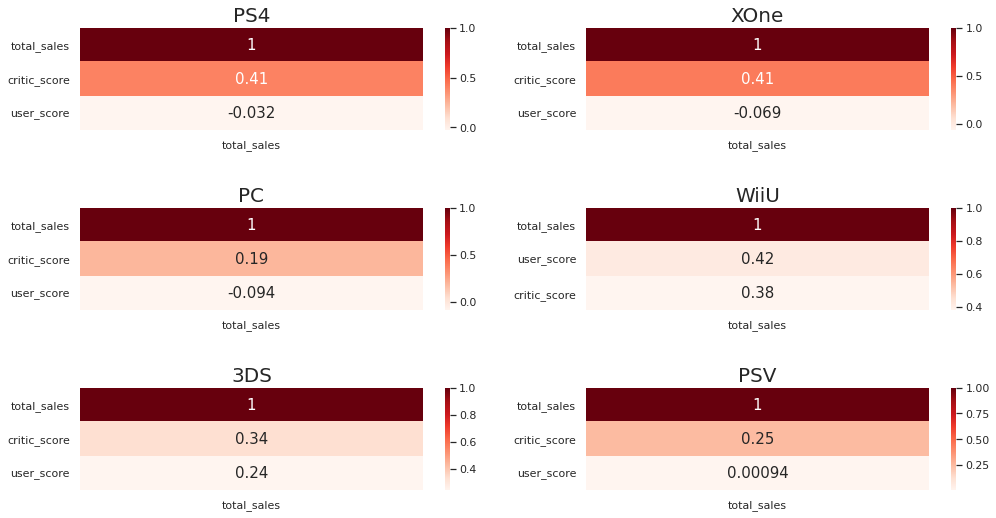

In [80]:
top_platforms = ['PS4','XOne','PC','WiiU','3DS', 'PSV']

rows = len(top_platforms) // 2
cols = 2
fig, axes = plt.subplots(rows, cols, figsize=(15,8))
count = 0
for r in range(rows):
    for c in range(cols):
        curr_platform = top_platforms[count]
        df_prep = games[(games['platform'] == curr_platform) & (games['user_score'] > 0)].copy()
        
        df_filtered = df_prep[['total_sales' ,'critic_score', 'user_score']]
        sns.set(font_scale=1.0)
        ax = sns.heatmap(df_filtered.corr()[['total_sales']].sort_values(by='total_sales', ascending=False), 
                         cmap="Reds", annot=True, annot_kws={'size':15}, ax=axes[r,c])
        ax.set_title(curr_platform, fontsize=20)
        ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
        plt.tight_layout(pad=3)
        count += 1

вывод: по убыванию корреляции critic_score(оценка критиков): PS4, XOne, WiiU, 3DS, PSV,PC;

       по убыванию корреляции user_score(оценка пользователей): почти нет связи,  
       исключение: WiiU, 3DS(влияют пользователи).

# Общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [81]:
distr_genre = games_top_6_platforms.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False).reset_index().rename_axis(None, axis=1)

distr_genre

,genre,total_sales
0,Action,99.56
1,Role-Playing,45.83
2,Shooter,33.31
3,Sports,32.46
4,Misc,20.37
5,Adventure,14.82
6,Platform,12.55
7,Fighting,11.49
8,Racing,9.68
9,Strategy,7.24


вывод: явные лидеры- игры жанра Action, затем идут role-playing(ролевые игры) и shooter(стрелялки), далее
       sports, misc и adventure;
       
       cамые непопулярные- игры жанра puzzle (головоломки)

Text(0, 0.5, 'Продажа')

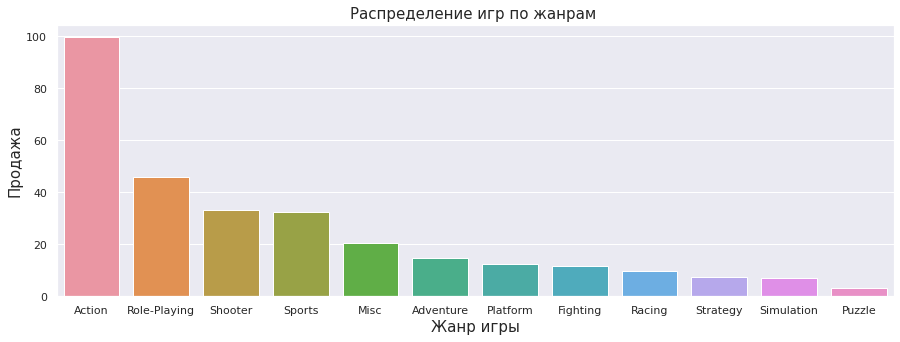

In [82]:
plt.figure(figsize=(15,5))
plt.title('Распределение игр по жанрам ',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанр игры',fontsize=15)
plt.ylabel('Продажа',fontsize=15)

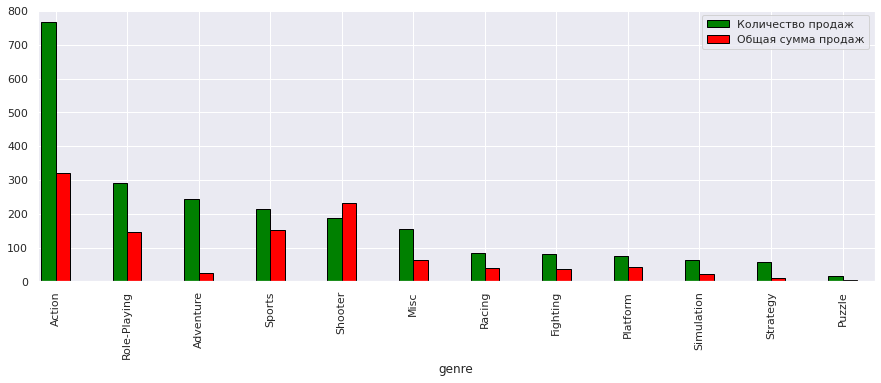

In [83]:
ax = plt.gca()

pivot = games.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

plot1 = pivot['name']
plot1.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2,color='green', position=1)

plot2 = pivot['total_sales']
plot2.plot(kind='bar', figsize=(15,5), ec='black', ax=ax, width=0.2, color='red', position=0)

ax.legend(['Количество продаж', 'Общая сумма продаж'])

сгруппируем по жанрам:

In [84]:
ratio_genres = games.groupby('genre').agg({'name': 'count', 'total_sales': 'sum'}).sort_values(by='name', ascending=False)

Соотношение выпущенных игр по жанрам к их сумарным продажам (ratio):

In [85]:
ratio_genres['ratio'] = ratio_genres['total_sales'] / ratio_genres['name']
ratio_genres.sort_values(by='ratio', ascending=False)

,name,total_sales,ratio
genre,,,
Shooter,187,232.98,1.245882
Sports,214,150.65,0.703972
Platform,74,42.63,0.576081
Role-Playing,292,145.89,0.499623
Racing,85,39.89,0.469294
Fighting,80,35.31,0.441375
Action,766,321.87,0.420196
Misc,155,62.82,0.405290
Simulation,62,21.76,0.350968


In [86]:
games.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales')

,total_sales
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


<AxesSubplot:ylabel='total_sales'>

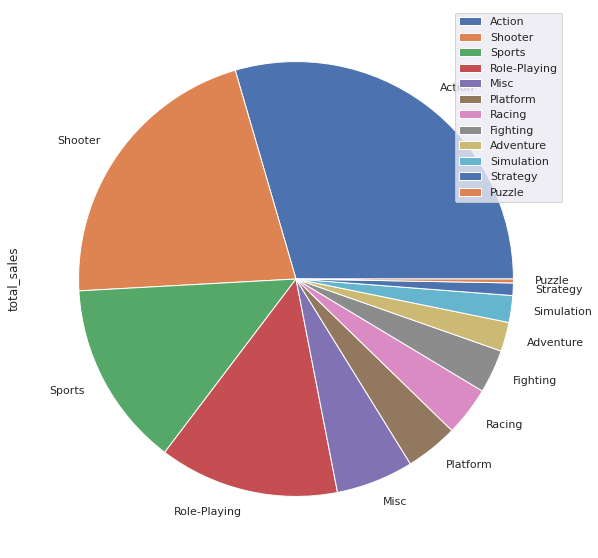

In [87]:
games.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales').plot(kind='pie', figsize=(10,10), y= 'total_sales')

вывод: самый прибыльный жанр игр- Action, Sports Shooter (стрелялки);
    
       самый неприбыльный жанр игр- Strategy(стратегия), (Adventure(приключения) 
       и Puzzle(головоломки).

# 3. Портрет пользователя каждого региона

Определить для пользователя каждого региона (NA, EU, JP):

-самые популярные платформы (топ-5), опишем различия в долях продаж;

-самые популярные жанры (топ-5), поясним разницу;

-определить, влияет ли рейтинг ESRB на продажи в отдельном регионе.

Функция для прорисовки графиков top_in_regions_plot (топ6 платформ)

In [88]:
def top_in_regions_plot(groupby, region_sales, ax):
    pivot = games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'North America Sales', 'eu_sales': 'Europe Sales', 'jp_sales': 'Japan Sales'}
    color_dict = {'na_sales': 'pink', 'eu_sales': 'blue', 'jp_sales': 'green'}
    plot = pivot.plot(kind='bar', ec='black', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=18, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)

Cамые популярные платформы (топ-5)


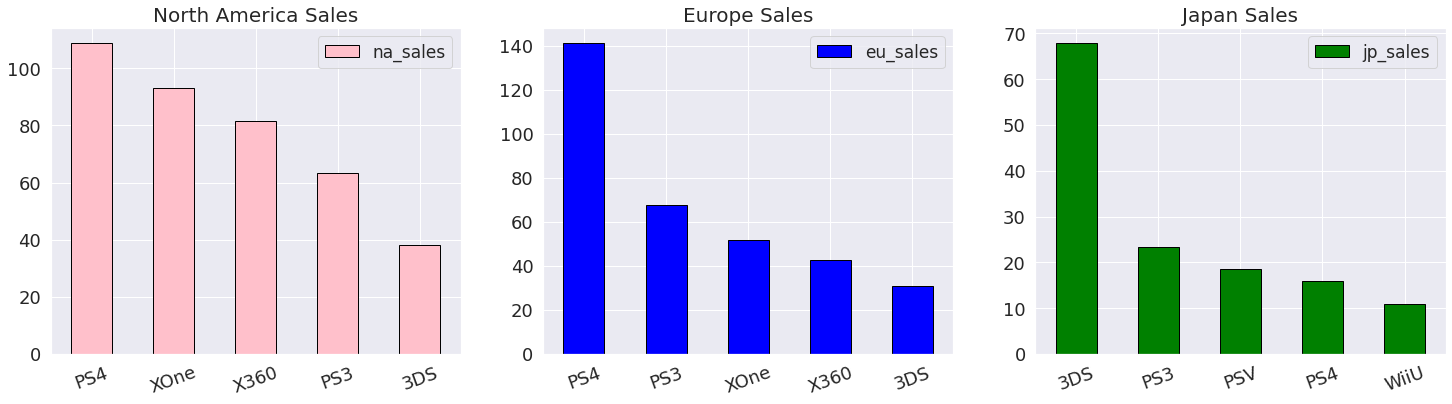

In [89]:
print ('Cамые популярные платформы (топ-5)')
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('platform', 'na_sales', 0)
top_in_regions_plot('platform', 'eu_sales', 1)
top_in_regions_plot('platform', 'jp_sales', 2)

Вывод

В Северной Америке (North America sales) самые популярыне приставки прошлого PS4, XOne и X360, немного отстает PS3;

В Европе(Europe sales) популярны PS4, PS3, далее XOne,X360 и 3DS;

В Японии (Japan sales) лидером является 3DS, далее PS3 и PSV, PS4.

Различия по популярности платформ в первую очередь зависят от влияния компании-производителя.

Самый популярный жанр игр в заданных регионах:

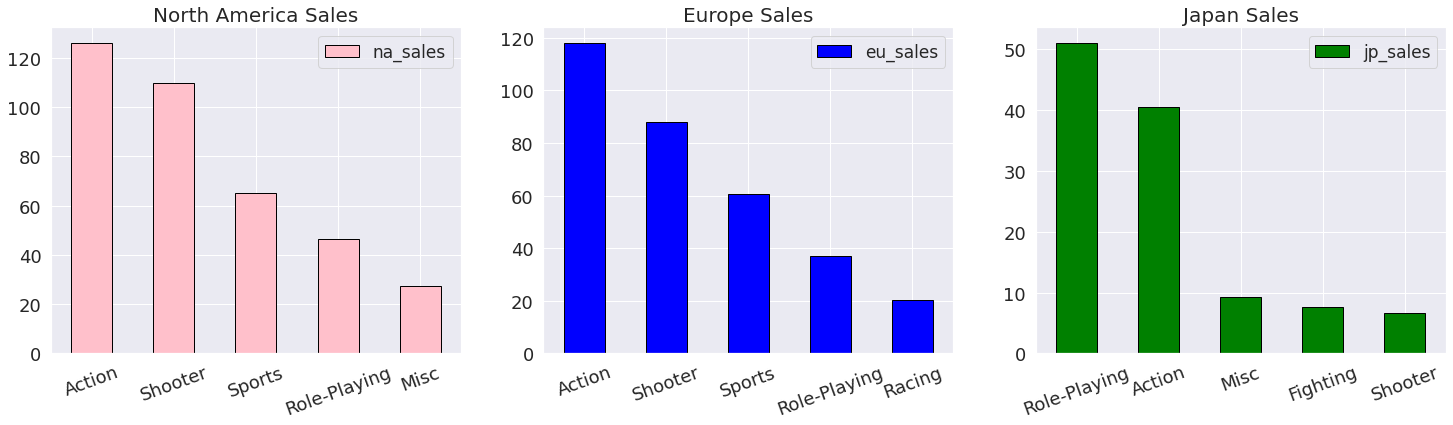

In [90]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('genre', 'na_sales', 0)
top_in_regions_plot('genre', 'eu_sales', 1)
top_in_regions_plot('genre', 'jp_sales', 2)


вывод: самые популярные жанры в Северной Америке и Европе одинаковы: лидер-экшены (action) и стрелялки(shooter),
       а также спортивные игры (sports);
       в Японии же лидер - ролевые игры (role-playing), далее экшены (action).

Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [91]:
ESRB_dict = {'E': 'Для всех','EC': '> 6 лет', 'E10+': '> 10 лет', 'M': '> 17 лет', 'T': '> 13 лет', 'AO': 'Для взрослых', 'RP': 'Рейтинг обсуждается', 'undefined': 'Не определен'}
games['ESRB_description'] = games[games['rating'].notnull()]['rating'].map(ESRB_dict)

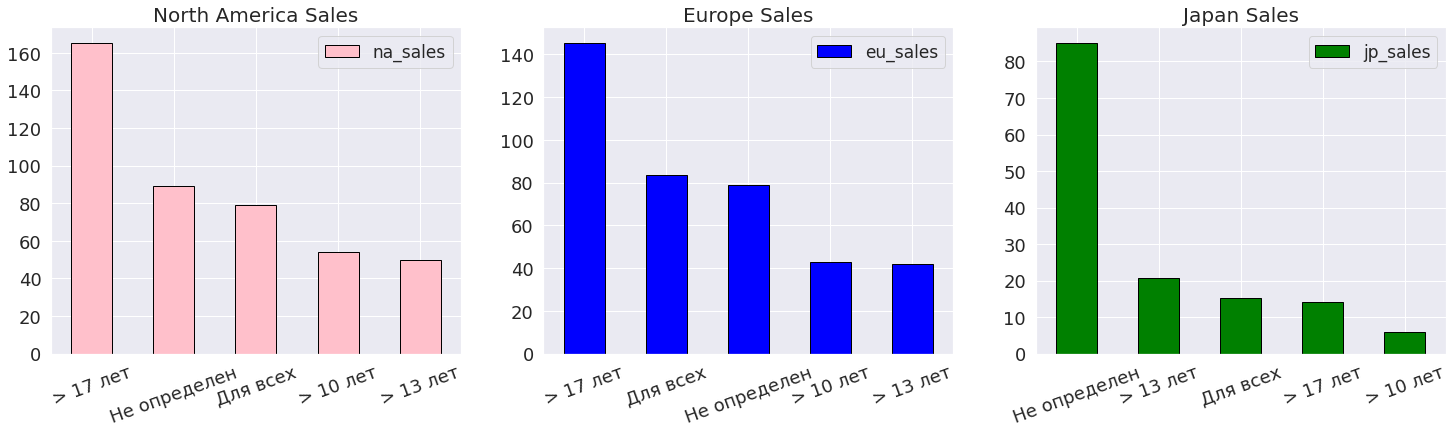

In [92]:
fig, axes = plt.subplots(1, 3, figsize=(25,6))

top_in_regions_plot('ESRB_description', 'na_sales', 0)
top_in_regions_plot('ESRB_description', 'eu_sales', 1)
top_in_regions_plot('ESRB_description', 'jp_sales', 2)

вывод:

В Северной Америке и в Европе картина практически одинаковая: Большая часть выручки получено с игр 
  с рейтингом ">17 лет" , а далее "для всех". Вероятно, эти рынки ориентированы больше на взрослых пользователей игр.

В Японии иначе: первое место  рейтинг "Не определен", вероятно,это связано с тем, что сам по себе рейтнг ESRB принадлежит американской компании, и поэтому не все японские игры проходят его. Также лидируют игры с возрастным рейтингом >13лет, вероятно, компании хотят распространить свое влияние на молодое поколение.
                

# 4. Проверка гипотез

Гипотезы:

средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

средние пользовательские рейтинги жанров Action и Sports разные.


Для проверки обеих гипотез будем использовать t-критерий Стьюдента, т.к. в обоих случаях выборки независимы между собой.

Определим пороговое значение alpha = 0.05

Гипотеза № 1:
    
средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н0 (нулевая гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги платформ Xbox One и PC отличаются между собой.

Оценки пользователей платформ  Xbox One и PC:

In [108]:
XOne = games[(games['platform'] == 'XOne') &  (games['user_score'] > 0)]['user_score']
PC = games[(games['platform'] == 'PC') &  (games['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC:', PC.mean())
print()


Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC: 6.2696774193548395



In [109]:
from scipy.stats import levene
stat, p = levene(XOne,PC)
p

0.003897553110130418

In [110]:


alpha = 0.05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results_1 = st.ttest_ind(
    XOne, 
    PC,
    equal_var = True)

print('p-значение:',results_1.pvalue)

if (results_1.pvalue < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 


p-значение: 0.14012658403611647
Не получилось отвергнуть нулевую гипотезу


вывод: Не получилось отвергнуть нулевую гипотезу.

Верно следующее утверждение: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.







Гипотеза № 2:
средние пользовательские рейтинги жанров Action и Sports разные.

Н0 (нулевая гипотеза) - средние пользовательские рейтинги жанров Action и Sports одинаковые.

Н1 (альтернативная гипотеза) - средние пользовательские рейтинги жанров Action и Sports отличаются между собой.



In [98]:
Action = games[(games['genre'] == 'Action') &  (games['user_score'] > 0)]['user_score']
Sports = games[(games['genre'] == 'Sports') &  (games['user_score'] > 0)]['user_score']
print('Средний пользовательский рейтинг жанра Action:', Action.mean())
print('Средний пользовательский рейтинг жанра Sports', Sports.mean())
print()

Средний пользовательский рейтинг жанра Action: 6.837532133676092
Средний пользовательский рейтинг жанра Sports 5.238124999999999



In [100]:
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales,ESRB_description
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05,> 17 лет
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27,> 17 лет
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,<NA>,NaN,undefined,14.63,Не определен
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,<NA>,NaN,undefined,14.60,Не определен
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62,> 17 лет
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01,Не определен
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01,Не определен
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01,Не определен
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,undefined,0.01,Не определен


In [101]:
#проверяем вторую гипотезу

alpha = 0.05

results_2 = st.ttest_ind(Action, Sports, equal_var=False)

print('p-значение:',results_2.pvalue)


if (results_2.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Вывод: отвергаем нулевую гипотезу

       Средние пользовательские рейтинги жанров Action и Sports отличаются.



# Общий вывод

В ходе проделанной работы было выполнено:

 Шаг 1. Изучение и подготовка данных
 
    -проведел первичную обработку и анализ данных;

    -заменил пропущенные значения на пустые строки в стобцах Name и Genre;

    -привел годы и оценки критиков в целочисленный тип;

    -привел оценки пользователей к типу float;

    -заменил в "rating" пропущенные значения на "undefiend";

    -добавил отдельный столбец с суммой продаж по всем регионам 'total_sales'
    
 Шаг 2. Исследовательский анализ данных
 
     -обнаружил, что рост выпуска игр приходится на 1994 год, а пик на 2008-2009 гг;
      
     -характерный срок жизни платформы - 9-10 лет, актульные данные начинаются с 2013г;
     
     -три самые прибыльные платформы: PS4, XOne, 3DS;
     
     -наибольшие медианные продажи у платформ WiiU, далее у XOne и PS4;

     -компьютерные игры PC стоят дешевле консольных;
     
     -лидеры-игры жанра Action, затем идут role-playing(ролевые игры) и shooter(стрелялки), 
      далее sports, misc и adventure;

     -cамые непопулярные- игры жанра puzzle (головоломки);
     
     -самый прибыльный жанр игр- Action, Sports, Shooter (стрелялки);

     -самый неприбыльный жанр игр- Strategy(стратегия), (Adventure(приключения) 
      и Puzzle(головоломки).
   
 Шаг 3. Портрет пользователя региона
 
      - в Северной Америке самые популярыные приставки  PS4, XOne и X360, немного отстает PS3;
        в Европе популярны PS4, PS3, далее XOne,X360 и 3DS; 
        в Японии (Japan sales) лидером является 3DS, далее PS3 и PSV, PS4.
        Различия по популярности платформ в первую очередь зависят от влияния компании-производителя.
        
      - самые популярные жанры в Северной Америке и Европе одинаковы:лидер-экшены (action) и стрелялки(shooter),
        а также спортивные игры (sports);
        в Японии же лидер - ролевые игры (role-playing), далее экшены (action).
        
      -В Северной Америке и в Европе большая часть выручки получено с игр с рейтингом ">17 лет" ,
       а далее "для всех". Вероятно, эти рынки ориентированы больше на взрослых пользователей игр.

       В Японии иначе: первое место рейтинг "Не определен", вероятно,это связано с тем, что сам по себе
       рейтнг ESRB принадлежит американской компании, и поэтому не все японские игры проходят его. 
       Также лидируют игры с возрастным рейтингом >13лет, вероятно, компании хотят распространить свое 
       влияние на молодое поколение.
       
       
 Шаг 4. Проверка гипотез
 
        Выполнены проверки гипотез:
 
       -Не получилось отвергнуть нулевую гипотезу.

        Верно следующее утверждение: средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

       -отвергаем нулевую гипотезу

        Средние пользовательские рейтинги жанров Action и Sports отличаются.

 Рекомендации для кампании на следующий год:

 1.Развивать современные платформы,покупать вышедшие и новые игры на PS4, XOne и 3DS.
 
 2.Увеличить количество популярных жанров игр: экшен, стрелялки, спортивные игры.
 
 3.Взаимодействовать с аудиторией 17+лет,тк  большинство игр рассчитано на игроков, 
   которые старше 17лет.

 4.Распространять компьютерные игры. Компьютер долго не выйдет из конкуренции за игроков.
 